## Table of Contents
* [Feature Engineering](#chapter_feature_engineering)
    * [EDA](#section_eda)
    * [Columns Selection](#section_column_selection)
    * [Columns Processing](#section_column_processing)
        * [Numerical Columns Processing](#sub_section_numerical_columns_processing)
        * [Categorical Columns Processing](#sub_section_categorical_columns_processing)
        * [Text Columns Processing](#sub_section_text_columns_processing)
            * [Why don't we use text columns in final model](#sub_sub_section_why_text_irrelevant)
        * [Zipcode Columns Processing](#sub_section_text_columns_processing)
        
* [train/test data processing in one place](#chapter_data_processing)
* [Model Selection](#chapter_model_selection)
* [Prediction for the leaderboard](#chapter_final)




# Feature Engineering <a class="anchor" id="chapter_feature_engineering"></a>

In [1]:
import pandas as pd
import sklearn as sk
import gensim
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from pathlib import Path


df = pd.read_csv('train.csv')

In [2]:
df.head()

,property_id,property_name,property_summary,property_space,property_desc,property_neighborhood,property_notes,property_transit,property_access,property_interaction,...,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,extra,target
0,1,"Chambre à louer,courte durée.","Je loue une chambre dans mon appartement ""atyp...","Espace duplex très grand et lumineux,la chambr...","Je loue une chambre dans mon appartement ""atyp...",NaN,NaN,Accès direct de la Gare du Nord ( 4 arrêts de...,NaN,Je suis entièrement disponible pour tout échan...,...,97.0,10.0,9.0,10.0,10.0,9.0,10.0,1.31,Host Has Profile Pic,26
1,2,Urban Antwerp - Spacious & Authentic Herenhouse,Our place is a typical historic herenhuis clos...,The spaces in our house are all large with hig...,Our place is a typical historic herenhuis clos...,Bar and restaurants One of our favourite bars ...,NaN,In Antwerp we have the system with rental bike...,You will be able to access the following space...,We are always available to help and assist whe...,...,100.0,10.0,10.0,10.0,10.0,8.0,10.0,1.00,"Host Has Profile Pic, Is Location Exact",75
2,3,comfortable apartment in friendly neighborhood,Nice and cozy apartment for couples who like t...,Nice proper and clean apartment. No personal s...,Nice and cozy apartment for couples who like t...,Op 5 minuten lopen zijn er 2 gezellig stadpark...,Public transport is next to the apartment and ...,Fiets verhuur voor de deur. (dag/weekkaart) vi...,As a good host I trust my guest. No secrets an...,"Ik ben altijd bereikbaar voor vragen, maar ben...",...,93.0,10.0,10.0,9.0,9.0,9.0,10.0,0.75,"Host Has Profile Pic, Is Location Exact, Insta...",110
3,4,Historical City Antwerp.,The best place to stay if you like to be in th...,Our rooms are nice and spacious. You stay in a...,The best place to stay if you like to be in th...,In the middle of the historical city of Antwerp,Staying in our house you have to be able to cl...,Tram 10 and 11 from Central station stop in ou...,Beside your own room you can relax in the down...,We will be available to let you know where wha...,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6.90,"Host Is Superhost, Host Has Profile Pic, Host ...",60
4,5,Antwerp center city,Our place is right in the heart of the histori...,It is situated in the center if the old town. ...,Our place is right in the heart of the histori...,The neighborhood is in the historical part of ...,NaN,The easiest is just to walk into the city ther...,You will enter the house through the Downstair...,I will be present to help you out with any kin...,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.16,"Host Is Superhost, Host Has Profile Pic, Host ...",55


In [3]:
df.columns

Index(['property_id', 'property_name', 'property_summary', 'property_space',
       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules', 'property_zipcode', 'property_lat', 'property_lon',
       'property_type', 'property_room_type', 'property_max_guests',
       'property_bathrooms', 'property_bedrooms', 'property_beds',
       'property_bed_type', 'property_amenities', 'property_sqfeet',
       'property_scraped_at', 'property_last_updated', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_nr_listings', 'host_nr_listings_total',
       'host_verified', 'booking_price_covers', 'booking_min_nights',
       'booking_max_nights', 'booking_availability_30',
       'booking_availability_60', 'booking_availability_90',
       'booking_availability_365', 'booking_cancel_policy', 'reviews_num',
       'reviews_first', 're

## EDA <a class="anchor" id="section_eda"></a>

!!!!!!!!!!

Should be added

!!!!!!!!!!

## Columns selection  <a class="anchor" id="section_column_selection"></a>

In [4]:
dates_columns = ['host_since', 'property_scraped_at', 'property_last_updated', 'reviews_first', 'reviews_last']
categorical_columns = ['property_type', 'property_room_type', 'property_bed_type', 'extra', 'property_amenities']
location_columns = ['host_location', 'property_zipcode', 'property_lat', 'property_lon'] # should be counted (according to lectures)
id_columns = ['property_id', 'host_id']
non_text_num_columns = set(dates_columns) | set(categorical_columns) | set(location_columns) | set(id_columns)
text_columns =list(
    set(df.select_dtypes(include='object').columns) -  non_text_num_columns
)
num_columns = list(
    set(df.columns) - set(text_columns) - set(non_text_num_columns) - set('target')
)
num_columns.remove('target')

In [5]:
y = df['target']
X = df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature eng is based on this article (general idea)

https://medium.com/@kamig4u/a-comprehensive-guide-to-feature-engineering-for-machine-learning-in-python-b017274129fe

## Columns processing  <a class="anchor" id="section_column_processing"></a>

###  Numerical columns <a class="anchor" id="sub_section_numerical_columns_processing"></a>

In [6]:
num_columns

['reviews_acc',
 'property_max_guests',
 'reviews_num',
 'host_response_rate',
 'booking_availability_90',
 'booking_min_nights',
 'booking_price_covers',
 'reviews_rating',
 'reviews_cleanliness',
 'reviews_value',
 'booking_max_nights',
 'reviews_per_month',
 'host_nr_listings_total',
 'reviews_communication',
 'booking_availability_30',
 'reviews_checkin',
 'property_bedrooms',
 'host_nr_listings',
 'booking_availability_365',
 'booking_availability_60',
 'property_sqfeet',
 'property_beds',
 'property_bathrooms',
 'reviews_location']

In [7]:
df[num_columns]

,reviews_acc,property_max_guests,reviews_num,host_response_rate,booking_availability_90,booking_min_nights,booking_price_covers,reviews_rating,reviews_cleanliness,reviews_value,...,booking_availability_30,reviews_checkin,property_bedrooms,host_nr_listings,booking_availability_365,booking_availability_60,property_sqfeet,property_beds,property_bathrooms,reviews_location
0,10.0,1,23,100.0,67,1,1,97.0,9.0,10.0,...,7,10.0,1.0,1.0,96,37,NaN,1.0,1.0,9.0
1,10.0,4,1,75.0,25,2,1,100.0,10.0,10.0,...,0,10.0,2.0,1.0,25,0,NaN,2.0,1.5,8.0
2,10.0,2,4,100.0,55,2,1,93.0,10.0,10.0,...,20,9.0,1.0,1.0,330,34,NaN,1.0,1.0,9.0
3,10.0,2,109,100.0,64,1,1,98.0,10.0,10.0,...,21,10.0,1.0,2.0,339,46,NaN,1.0,1.0,10.0
4,10.0,2,61,100.0,80,1,1,97.0,10.0,10.0,...,23,10.0,1.0,2.0,355,50,NaN,1.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,10.0,2,4,100.0,62,2,1,100.0,10.0,10.0,...,8,10.0,1.0,1.0,140,32,NaN,1.0,1.0,10.0
6491,NaN,2,0,100.0,61,1,1,NaN,NaN,NaN,...,6,NaN,1.0,1.0,249,36,NaN,1.0,1.0,NaN
6492,NaN,2,0,NaN,0,2,1,NaN,NaN,NaN,...,0,NaN,1.0,1.0,0,0,NaN,1.0,1.0,NaN
6493,10.0,4,9,NaN,0,2,2,100.0,10.0,10.0,...,0,10.0,1.0,2.0,0,0,NaN,2.0,1.0,8.0


#### Handling missing values

In [8]:
X_train[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5196 entries, 5399 to 860
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   reviews_acc               4067 non-null   float64
 1   property_max_guests       5196 non-null   int64  
 2   reviews_num               5196 non-null   int64  
 3   host_response_rate        4011 non-null   float64
 4   booking_availability_90   5196 non-null   int64  
 5   booking_min_nights        5196 non-null   int64  
 6   booking_price_covers      5196 non-null   int64  
 7   reviews_rating            4083 non-null   float64
 8   reviews_cleanliness       4070 non-null   float64
 9   reviews_value             4063 non-null   float64
 10  booking_max_nights        5196 non-null   int64  
 11  reviews_per_month         4160 non-null   float64
 12  host_nr_listings_total    5196 non-null   float64
 13  reviews_communication     4070 non-null   float64
 14  bookin

**Since amount of non-null in 'property_sqfeet' is small, we can remove this column**. For other numerical columns the amount of nulls is too small to remove columns entirely, but too big to remove the null containing rows.

In [9]:
if 'property_sqfeet' in num_columns:
    num_columns.remove('property_sqfeet') 

#### Imputation

Useful resource: https://scikit-learn.org/stable/modules/impute.html

In this part we will try to replace missing numerical values with a median of numerical. Also for each collumn  value we will add a meta column, indicating missing values.

https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/


> https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html
> 
>error_on_newbool, default=True
If True, transform will raise an error when there are features with missing values that have no missing values in fit. This is applicable only when features='missing-only'.

In [10]:
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import MinMaxScaler

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer


num_transformer = FeatureUnion(
    transformer_list=[
        #('features', SimpleImputer(strategy='mean', missing_values = np.nan)),
        #('features', IterativeImputer(max_iter=10, random_state=0, missing_values = np.nan)),
        ('features', KNNImputer(n_neighbors=2, weights="uniform", missing_values = np.nan)),
        ('indicators', MissingIndicator(error_on_new=False))
        ])
        #,('scaler', MinMaxScaler())])
num_transformer = num_transformer.fit(X_train[num_columns], y_train)
scaler = MinMaxScaler().fit(num_transformer.transform(X_train[num_columns]))        

#scaler.transform(num_transformer.transform(X_train[num_columns]))
def transform_num_cols(X_num):
    feature_transformed = num_transformer.transform(X_num)
    return scaler.transform(feature_transformed)

In [11]:
X_train_num_transformed = transform_num_cols(X_train[num_columns])
X_test_num_transformed = transform_num_cols(X_test[num_columns])

# X_train_transformed = X_train[num_columns]
# X_test_transformed = X_test[num_columns]

# for col in num_columns:
#     X_train_transformed[col].fillna(value=X_train[col].median())
#     X_test_transformed[col].fillna(value=X_train[col].median())

In [12]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#Quick version
#__________________________________________________
def test_prediction_perfomance(X_train_transformed, X_test_transformed):
    xgb_model = xgb.XGBRegressor(max_depth=3, n_estimators=200, learning_rate=.05)
    #xgb_model = xgb.XGBRegressor(max_depth=3, n_estimators=200, learning_rate=0.01)

    xgb_model.fit(X_train_transformed, y_train)


    baseline_arr = np.repeat(y_test.mean(), len(y_test))
    print("Test Baseline RMSE:", np.sqrt(mean_squared_error(y_test, baseline_arr)))

    y_pred_test = xgb_model.predict(X_test_transformed)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print("Test RMSE:", rmse_test)


    y_pred_train = xgb_model.predict(X_train_transformed)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    print("train RMSE:", rmse_train)


# def test_prediction_perfomance(X_train_transformed, X_test_transformed):
#     xgb_model = xgb.XGBRegressor()

#     # Set up grid search
#     param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [200],
#     'subsample': [0.5, 0.7, 1],
#     'colsample_bytree': [0.5, 0.7, 1],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [0, 0.1, 1],
#     }
#     grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)

#     # Fit grid search on training data
#     grid_search.fit(X_train_transformed, y_train)

#     # Use best model from grid search to make predictions on test data
#     best_model = grid_search.best_estimator_
#     y_pred_test = best_model.predict(X_test_transformed)

    
#     baseline_arr = np.repeat(y_test.mean(), len(y_test))
#     print("Test Baseline RMSE:", np.sqrt(mean_squared_error(y_test, baseline_arr)))

    
#     # Print test RMSE
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     print("Test RMSE:", rmse_test)

#     # Print train RMSE for best model
#     y_pred_train = best_model.predict(X_train_transformed)
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     print("Train RMSE:", rmse_train)
    
#     return best_model






    
test_prediction_perfomance(X_train_num_transformed, X_test_num_transformed)

Test Baseline RMSE: 48.34286693559797
Test RMSE: 48.65759823466821
train RMSE: 48.90282704677884


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#Quick version
#__________________________________________________
def test_prediction_perfomance(X_train_transformed, X_test_transformed):
    rf_model = RandomForestRegressor(max_depth=3, n_estimators=200, random_state=42)
    

    rf_model.fit(X_train_transformed, y_train)


    baseline_arr = np.repeat(y_test.mean(), len(y_test))
    print("Test Baseline RMSE:", np.sqrt(mean_squared_error(y_test, baseline_arr)))

    y_pred_test = rf_model.predict(X_test_transformed)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print("Test RMSE:", rmse_test)


    y_pred_train = rf_model.predict(X_train_transformed)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    print("train RMSE:", rmse_train)
    
test_prediction_perfomance(X_train_num_transformed, X_test_num_transformed)

Test Baseline RMSE: 48.34286693559797
Test RMSE: 48.957931801006424
train RMSE: 51.09949030295397


###  Categorical columns <a class="anchor" id="sub_section_categorical_columns_processing"></a>

In [14]:
X[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   property_type       6495 non-null   object
 1   property_room_type  6495 non-null   object
 2   property_bed_type   6495 non-null   object
 3   extra               6490 non-null   object
 4   property_amenities  6443 non-null   object
dtypes: object(5)
memory usage: 253.8+ KB


### 'extra'  and 'property_amenities'

We need to transorm expressions like this 'Host Has Profile Pic, Is Location Exact' (**In the text below this categorical will be called complex categorical)** into vectors

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

extra_vectorizer = CountVectorizer(binary=True, tokenizer=lambda x: x.split(', '))
extra_vectorizer.fit(X_train['extra'].fillna('')) 

property_amenities_vectorizer = CountVectorizer(binary=True, tokenizer=lambda x: x.split(', '))
property_amenities_vectorizer.fit(X_train['property_amenities'].fillna('')) 

C:\Users\jensd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(binary=True,
                tokenizer=<function <lambda> at 0x0000015C0D653B50>)

### !!!!!!!! Property ammenities are  transformed to 102 length vector .

In [16]:
X_extra_train = extra_vectorizer.transform(X_train['extra'].fillna('')).toarray()
X_extra_test = extra_vectorizer.transform(X_test['extra'].fillna('')).toarray()

X_property_amenities_train = property_amenities_vectorizer.transform(X_train['property_amenities'].fillna('')).toarray()
X_property_amenities_test = property_amenities_vectorizer.transform(X_test['property_amenities'].fillna('')).toarray()

In [17]:
X_property_amenities_train.shape

(5196, 102)

In [18]:
prcsd_X_train = np.concatenate((X_train_num_transformed, X_extra_train, X_property_amenities_train), axis=1)
prcsd_X_test = np.concatenate((X_test_num_transformed, X_extra_test, X_property_amenities_test), axis=1)

test_prediction_perfomance(prcsd_X_train, prcsd_X_test)

Test Baseline RMSE: 48.34286693559797
Test RMSE: 49.106928391577505
train RMSE: 51.06741027257085


### Other categorical columns  

For other categorical columns we will do simple label encoding

In [19]:
from sklearn.preprocessing import LabelEncoder


def transform_categorical(X):
    X_categorical = X[[col for col in categorical_columns if col != 'extra']]
    le = LabelEncoder()
    for col in X_categorical.columns:
        X_categorical[col] = le.fit_transform(X_categorical[col])
    
    return X_categorical

In [20]:
X_categorical_train = transform_categorical(X_train[categorical_columns]).to_numpy()
X_categorical_test = transform_categorical(X_test[categorical_columns]).to_numpy()

C:\Users\jensd\AppData\Local\Temp\ipykernel_1100\3595429743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical[col] = le.fit_transform(X_categorical[col])
C:\Users\jensd\AppData\Local\Temp\ipykernel_1100\3595429743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical[col] = le.fit_transform(X_categorical[col])
C:\Users\jensd\AppData\Local\Temp\ipykernel_1100\3595429743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [21]:
transformed_X_train = np.concatenate(
    (
        X_train_num_transformed, 
      #  X_extra_train, 
        X_categorical_train
    ), 
    axis=1

)

transformed_X_test = np.concatenate(
    (
        X_test_num_transformed, 
       # X_extra_test, 
        X_categorical_test
    ), 
    axis=1

)


test_prediction_perfomance(transformed_X_train, transformed_X_test)

Test Baseline RMSE: 48.34286693559797
Test RMSE: 49.28263557195914
train RMSE: 50.94598216758568


###  Zipcode columns <a class="anchor" id="sub_section_zipcode_columns_processing"></a>

In [22]:
len(X['property_zipcode'].unique())

42

In [23]:
set(X_test['property_zipcode'].unique()) - set(X_train['property_zipcode'].unique())

{'1620'}

To many unique zipcodes for vectorization, that is why target encoding is used. Target Encoding encodes the zipcode values with the average target value.

In [24]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=['property_zipcode'])
X_train_zipcod_encoded = target_encoder.fit_transform(X_train['property_zipcode'], y_train)
X_test_zipcod_encoded = target_encoder.transform(X_test['property_zipcode'])


In [25]:
df[text_columns]

,property_desc,property_summary,property_neighborhood,host_verified,property_rules,property_interaction,property_space,host_response_time,property_notes,property_access,property_name,host_about,property_transit,booking_cancel_policy
0,"Je loue une chambre dans mon appartement ""atyp...","Je loue une chambre dans mon appartement ""atyp...",NaN,"email, phone, reviews",NaN,Je suis entièrement disponible pour tout échan...,"Espace duplex très grand et lumineux,la chambr...",within a few hours,NaN,NaN,"Chambre à louer,courte durée.",NaN,Accès direct de la Gare du Nord ( 4 arrêts de...,flexible
1,Our place is a typical historic herenhuis clos...,Our place is a typical historic herenhuis clos...,Bar and restaurants One of our favourite bars ...,"email, phone, reviews",NaN,We are always available to help and assist whe...,The spaces in our house are all large with hig...,within a few hours,NaN,You will be able to access the following space...,Urban Antwerp - Spacious & Authentic Herenhouse,NaN,In Antwerp we have the system with rental bike...,flexible
2,Nice and cozy apartment for couples who like t...,Nice and cozy apartment for couples who like t...,Op 5 minuten lopen zijn er 2 gezellig stadpark...,"email, phone, reviews",NaN,"Ik ben altijd bereikbaar voor vragen, maar ben...",Nice proper and clean apartment. No personal s...,within an hour,Public transport is next to the apartment and ...,As a good host I trust my guest. No secrets an...,comfortable apartment in friendly neighborhood,ik ben een expat die alleen mid weeks in Antwe...,Fiets verhuur voor de deur. (dag/weekkaart) vi...,flexible
3,The best place to stay if you like to be in th...,The best place to stay if you like to be in th...,In the middle of the historical city of Antwerp,"email, phone, facebook, reviews, jumio",Respectful towards other guest and host! No pets!,We will be available to let you know where wha...,Our rooms are nice and spacious. You stay in a...,within an hour,Staying in our house you have to be able to cl...,Beside your own room you can relax in the down...,Historical City Antwerp.,"Hello, I was born in the Netherlands and i sp...",Tram 10 and 11 from Central station stop in ou...,flexible
4,Our place is right in the heart of the histori...,Our place is right in the heart of the histori...,The neighborhood is in the historical part of ...,"email, phone, facebook, reviews, jumio",Respect to other guests and host! And keep the...,I will be present to help you out with any kin...,It is situated in the center if the old town. ...,within an hour,NaN,You will enter the house through the Downstair...,Antwerp center city,"Hello, I was born in the Netherlands and i sp...",The easiest is just to walk into the city ther...,flexible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,"Photos de l'appartement sur demande, merci Peu...","Photos de l'appartement sur demande, merci Peu...",L'esprit familial et calme,"email, phone, reviews, jumio, offline_governme...","Logement propre, respect des lieux et voisins....",Je travaille beaucoup mais j'aime faire des co...,"Balcon, grande cuisine et chambre privée avec ...",within a few hours,NaN,À tout l'appartement sauf ma chambre,Grand appartement Saint Gilles avec balcon,NaN,Porte de hal à 10min à pied métro 2/6 Tram 3/4...,flexible
6491,Grande maison sur 4 étages dans un quartier ca...,NaN,"Tout est disponible à proximité, beaucoup de c...","email, phone, reviews",Simple respect des espaces communs! :),NaN,Grande maison sur 4 étages dans un quartier ca...,within an hour,NaN,"Un grand salon chaleureux ou prendre le thé, u...",Chambre cosy dans une grande maison,"Graphiste de 26 ans, j'aime les animaux, les b...","Par les trams 4, 51 ou 92. Et en train par la ...",flexible
6492,"Spacious, modern apartment in industrial build...","Spacious, modern apartment in industrial build...",Upcoming neighborhood. 1-minute walk from the ...,"email, phone, reviews, jumio","The usuals: Respect the neighbors, respect the.

###  Text columns <a class="anchor" id="sub_section_text_columns_processing"></a>

I think it is useless. But our goal is maximize the assignment grade. And I think showing that we can deal with text data will increase it.

I chose 'poperty_desc', because it seamse the most informative one.

In [26]:
selected_text_cols = ['property_desc']

In [27]:
df[selected_text_cols].head()

,property_desc
0,"Je loue une chambre dans mon appartement ""atyp..."
1,Our place is a typical historic herenhuis clos...
2,Nice and cozy apartment for couples who like t...
3,The best place to stay if you like to be in th...
4,Our place is right in the heart of the histori...


Implementation based on https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html


#### Training doc2vec model

In [28]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

def train_doc2vec(text_df_train):
    data = text_df_train.fillna(value='')
    # preprocess the text data
    for col in data.columns:
        data[col] = data[col].apply(lambda x: word_tokenize(x.lower()))

    # create a list of TaggedDocuments for each text column
    tagged_data = []
    for col in data.columns:
        for i, row in data.iterrows():
            tagged_data.append(TaggedDocument(row[col], [i]))

    # train a Doc2Vec model on the tagged documents
    
    ## UPDATE vector size
    return Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4, epochs=50)

Added model to the repository, so you will not have to retrain it.

**!!! If you want to retrain the model, check that doc2vec_model file is deleted**

In [29]:
from gensim.test.utils import get_tmpfile



doc2vec_model_file = Path("doc2vec_model")
doc2vec_model = None

if doc2vec_model_file.is_file():
    doc2vec_model = Doc2Vec.load(str(doc2vec_model_file))
else:
    doc2vec_model = train_doc2vec( X_train[selected_text_cols])
    doc2vec_model.save(str(doc2vec_model_file))


In [30]:
# returns tokenized version of the text dataframe, based on doc2vec_model
def process_text2vec(text_df, doc2vec_model):
    text_df = text_df.fillna(value='')
  
    for col in text_df.columns:
        text_df[col] = text_df[col].apply(lambda x: word_tokenize(x.lower()))

    vectors = []
    for col in text_df.columns:
        vectors.append(np.array([doc2vec_model.infer_vector(row[col]) for _, row in text_df.iterrows()]))
        
    result = np.concatenate(vectors, axis=1)
    return pd.DataFrame(result)

**same as for model. Want to retrain -> delete the files.**

In [31]:
processed_X_text_train_file = Path("processed_X_text_train")
processed_X_text_train = None
if processed_X_text_train_file.is_file():
    processed_X_text_train = pd.read_csv(str(processed_X_text_train_file), index_col=0)
else:
    processed_X_text_train = process_text2vec(X_train[selected_text_cols], doc2vec_model)
    processed_X_text_train.to_csv(str(processed_X_text_train_file))

In [32]:
processed_X_text_test_file = Path("processed_X_text_test")
processed_X_text_test = None
if processed_X_text_test_file.is_file():
    processed_X_text_test = pd.read_csv(str(processed_X_text_test_file), index_col=0)
else:
    processed_X_text_test = process_text2vec(
        X_test[selected_text_cols], 
        doc2vec_model
    )
    processed_X_text_test.to_csv(str(processed_X_text_test_file))

In [33]:
processed_X_text_test.shape, processed_X_text_train.shape 

((1299, 100), (5196, 100))

In [34]:
processed_X_text_train.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.024317,0.225665,-0.268531,0.138587,-0.342686,-0.461406,-0.114332,0.397135,-0.701544,0.002592,...,0.296500,0.179457,-0.068471,0.272793,0.191069,-0.083809,-0.193514,0.203645,-0.047636,0.063227
1,-2.025770,1.431198,0.556898,-2.060159,-0.556510,-1.138318,0.533208,-0.132157,-0.784602,-0.053418,...,-0.006200,-0.281815,0.079278,0.365237,1.046593,-0.512739,-0.062049,0.685071,-0.207918,0.332389
2,-0.341231,0.263553,-0.537669,-0.278001,0.314643,-0.322728,1.304294,0.675816,0.319008,-0.186058,...,0.076096,0.577473,-0.170814,0.005089,0.118834,-0.578633,-0.463906,0.114346,-0.840983,-0.706384
3,-0.782496,-0.488872,-0.093793,0.380050,0.895403,-1.867550,0.982126,1.899841,-0.086250,-0.468666,...,0.487879,-0.811305,0.129048,0.519895,-0.784804,0.310030,2.141444,0.579195,-1.549346,-0.759583
4,0.759379,0.312436,-1.321246,-0.030975,-0.936966,-0.546340,0.389300,-0.274620,-0.205093,0.685693,...,0.394851,-0.382363,0.929272,-0.418347,0.797470,-0.142275,0.524288,-1.324281,-0.442068,-0.714685


#### Why don't we use text columns in final model? <a class="anchor" id="sub_sub_section_why_text_irrelevant"></a>

In [35]:
transformed_X_train = np.concatenate(
    (
        X_train_num_transformed, 
        X_extra_train, 
        X_property_amenities_train,
        X_categorical_train,
        X_train_zipcod_encoded.to_numpy(),
        processed_X_text_train.to_numpy()
    ), 
    axis=1

)

transformed_X_test = np.concatenate(
    (
        X_test_num_transformed, 
        X_extra_test, 
        X_property_amenities_test,
        X_categorical_test,
        X_test_zipcod_encoded.to_numpy(),
        processed_X_text_test.to_numpy()
    ), 
    axis=1

)


test_prediction_perfomance(transformed_X_train, transformed_X_test)

Test Baseline RMSE: 48.34286693559797
Test RMSE: 52.40203916682688
train RMSE: 49.92425130909439


Number of columns became too big, this causes overfitting. That is why we don't use text in the model.
____

**Must be in the report!!!!**

# train/test data processing in one place <a class="anchor" id="chapter_data_processing"></a>

In [36]:
transformed_X_train = np.concatenate(
    (
        X_train_num_transformed, 
        X_extra_train, 
        X_property_amenities_train,
        X_categorical_train,
        X_train_zipcod_encoded.to_numpy(),
   #     processed_X_text_train.to_numpy()
    ), 
    axis=1

)

transformed_X_test = np.concatenate(
    (
        X_test_num_transformed, 
        X_extra_test, 
        X_property_amenities_test,
        X_categorical_test,
        X_test_zipcod_encoded.to_numpy(),
    #    processed_X_text_test.to_numpy()
    ), 
    axis=1

)


test_prediction_perfomance(transformed_X_train, transformed_X_test)

Test Baseline RMSE: 48.34286693559797
Test RMSE: 48.88029460645086
train RMSE: 50.906952938047915


# Model Selection  <a class="anchor" id="chapter_model_selection"></a>

### Dmitry's model

In [37]:
dmitry_model = xgb.XGBRegressor(max_depth=3, n_estimators=200, learning_rate=.05)
    #xgb_model = xgb.XGBRegressor(max_depth=3, n_estimators=200, learning_rate=0.01)

dmitry_model.fit(transformed_X_train, y_train)


y_pred_test = dmitry_model.predict(transformed_X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)


y_pred_train = dmitry_model.predict(transformed_X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("train RMSE:", rmse_train)

Test RMSE: 48.80202787520318
train RMSE: 48.316266858365694


### Jens' model

In [38]:
from sklearn.ensemble import RandomForestRegressor

jens_model = RandomForestRegressor(n_estimators=200, max_depth=3, random_state=42)
jens_model.fit(transformed_X_train, y_train)

y_pred_test = jens_model.predict(transformed_X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)

y_pred_train = jens_model.predict(transformed_X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Train RMSE:", rmse_train)

Test RMSE: 48.88029460645086
Train RMSE: 50.906952938047915


### Models comparison

In [39]:
models = {
    'Dmitry: XGBRegressor(max_depth=3, n_estimators=200, learning_rate=.05)': dmitry_model,
    'jens: RandomForestRegressor(n_estimators=200, max_depth=3, random_state=42)': jens_model
}

In [40]:
from sklearn.model_selection import KFold, cross_val_score

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, transformed_X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    results.append(np.sqrt(-cv_results))

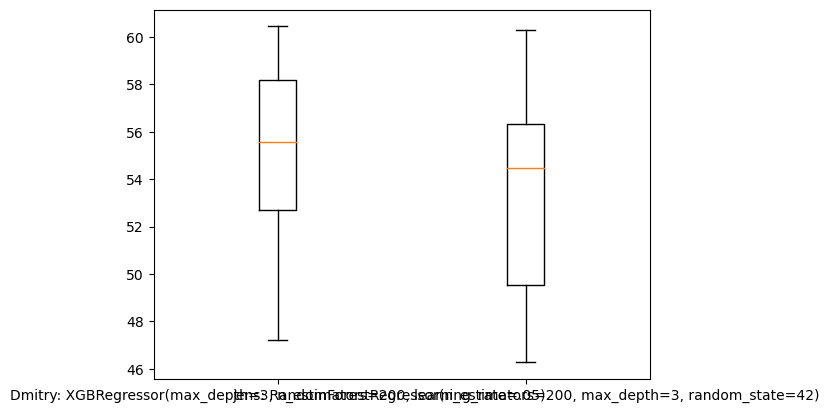

In [41]:
from matplotlib import pyplot as plt

plt.boxplot(results, labels=models.keys())
plt.show()

In [42]:
pd.DataFrame({
    'RMSE on the test set': [mean_squared_error(y_test, m.predict(transformed_X_test), squared=False) for m in models.values()] 
}, index=models.keys())

,RMSE on the test set
"Dmitry: XGBRegressor(max_depth=3, n_estimators=200, learning_rate=.05)",48.802028
"jens: RandomForestRegressor(n_estimators=200, max_depth=3, random_state=42)",48.880295


### Final model

In [43]:
final_model = dmitry_model

# Prediction data for the leadearboard <a class="anchor" id="chapter_final"></a>

In [44]:
X_scoring = pd.read_csv('test.csv')
X_scoring
X_scoring_num_transformed = transform_num_cols(X_scoring[num_columns])
X_extra_scoring = extra_vectorizer.transform(X_scoring['extra'].fillna('')).toarray()
X_property_amenities_scoring = property_amenities_vectorizer.transform(X_scoring['property_amenities'].fillna('')).toarray()
X_categorical_scoring = transform_categorical(X_scoring[categorical_columns]).to_numpy()
X_scoring_zipcod_encoded = target_encoder.transform(X_scoring['property_zipcode'])


transformed_X_scoring = np.concatenate(
    (
        X_scoring_num_transformed, 
        X_extra_scoring, 
        X_property_amenities_scoring,
        X_categorical_scoring,
        X_scoring_zipcod_encoded.to_numpy()
    ), 
    axis=1

)

C:\Users\jensd\AppData\Local\Temp\ipykernel_1100\3595429743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical[col] = le.fit_transform(X_categorical[col])
C:\Users\jensd\AppData\Local\Temp\ipykernel_1100\3595429743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical[col] = le.fit_transform(X_categorical[col])
C:\Users\jensd\AppData\Local\Temp\ipykernel_1100\3595429743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [45]:
y_pred_scoring = final_model.predict(transformed_X_scoring)
pd.DataFrame({'a': X_scoring['property_id'].to_numpy(), 'b': y_pred_scoring}).to_csv('scoring.csv', header=False, index=False)

In [46]:
pd.DataFrame(
    {'a': X_scoring['property_id'].to_numpy(), 
     'b': np.repeat(np.mean(y_train), len(X_scoring['property_id']))}
).to_csv('scoring.csv', header=False, index=False)